In [66]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import seaborn as sns
import matplotlib.pyplot as plt

## Explorative data analysis

In [2]:

df_movies = pd.read_csv("../data/Large-data/ml-latest/movies.csv")
df_ratings = pd.read_csv("../data/Large-data/ml-latest/ratings.csv")

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [94]:
df_ratings.isnull()

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
27753439,False,False,False,False
27753440,False,False,False,False
27753441,False,False,False,False
27753442,False,False,False,False


In [91]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [98]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


## Finding the 10 most rated movies

In [45]:
most_rated = df_ratings["movieId"].value_counts().head(10).reset_index().rename(columns={"index": "movieId", "movieId": "times_rated"})
most_rated

,movieId,times_rated
0,318,97999
1,356,97040
2,296,92406
3,593,87899
4,2571,84545
5,260,81815
6,480,76451
7,527,71516
8,110,68803
9,1,68469


In [47]:
most_rated_movies = df_movies[df_movies["movieId"].isin(most_rated["movieId"])]
most_rated_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
108,110,Braveheart (1995),Action|Drama|War
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
315,318,"Shawshank Redemption, The (1994)",Crime|Drama
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War
476,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
523,527,Schindler's List (1993),Drama|War
587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2487,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [57]:
most_rated_movies = most_rated_movies.join(most_rated.set_index("movieId"), on="movieId").sort_values("times_rated", ascending=False)

<Axes: xlabel='times_rated', ylabel='title'>

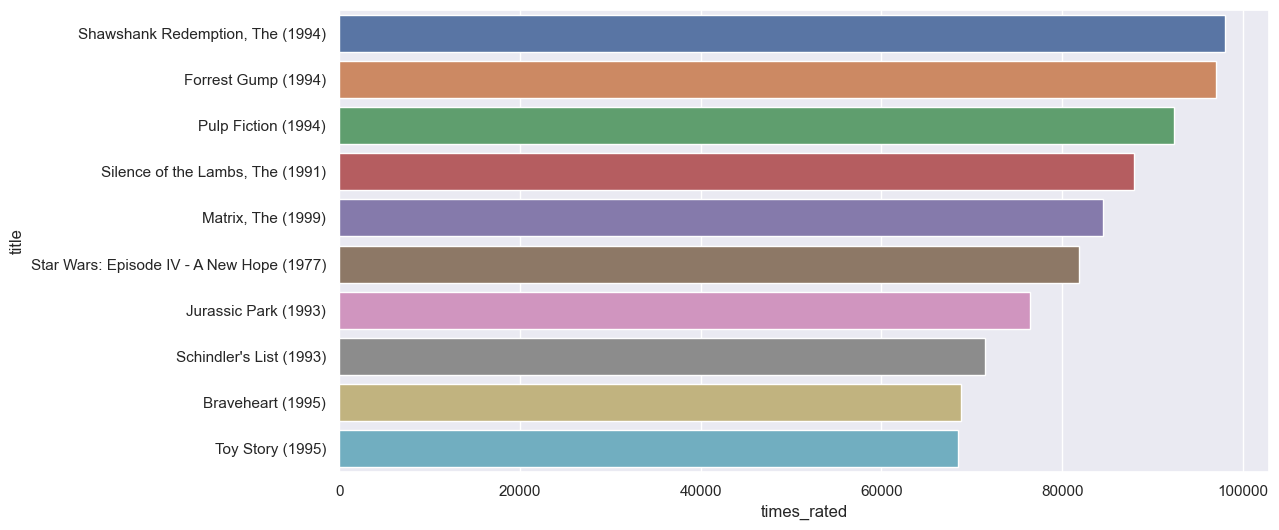

In [83]:
sns.barplot(data=most_rated_movies, y="title", x="times_rated")

In [87]:
# average rating for these 10 movies
avg_rating = df_ratings[df_ratings["movieId"].isin(most_rated["movieId"])]
avg_rating["rating"].mean()

4.102288186731129

In [89]:
avg_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826943 entries, 42 to 27753398
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     826943 non-null  int64  
 1   movieId    826943 non-null  int64  
 2   rating     826943 non-null  float64
 3   timestamp  826943 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 31.5 MB
